In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [10]:
FLAVORS=['nue','nuebar','numu','numubar']
def get_all_fluxes(horn):
    flux={}
    el = {}
    er = {}
    ec = {}
    de = {}
    for nu in FLAVORS:
        flux[nu]= np.genfromtxt(f"{nu}{horn}.txt",skip_header=0)[0]/1e4/0.5 # to 1/cm^2/GeV/POT
    return flux

en=np.linspace(0,200*0.5,200+1)
de=0.5
el=en[:-1]
er=en[1:]
ec=el+de/2.0
fhc =get_all_fluxes('FHC')
rhc =get_all_fluxes('RHC')

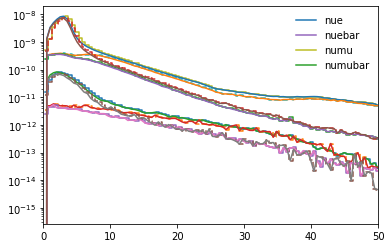

In [11]:
myE = np.linspace(0,50.0,100)
interp_fhc={}
interp_rhc={}
for nu in FLAVORS:
    plt.step(ec, fhc[nu],label=nu, where='post')
    plt.step(ec, rhc[nu],ls='--', where='post')
    func=interpolate.interp1d(ec,fhc[nu],bounds_error=False,fill_value=0,kind='nearest')
    interp_fhc[nu]=func(myE)
    plt.plot(myE,interp_fhc[nu])
   
    func=interpolate.interp1d(ec,rhc[nu],bounds_error=False,fill_value=0,kind='nearest')
    interp_rhc[nu]=func(myE)
    plt.plot(myE,interp_rhc[nu])

plt.xlim(0.0,50)
# plt.ylim(1e-3,1e2)
plt.yscale('log')
plt.legend(frameon=False)

In [14]:
np.sum(interp_fhc['numu']*(myE[1]-myE[0]))

2.8583948929292935e-08

In [16]:
globes_fhc = [myE, 
                interp_fhc['nue'],
              interp_fhc['numu'],
              interp_fhc['numu']*0,
                interp_fhc['nuebar'],
              interp_fhc['numubar'],
              interp_fhc['numu']*0]              

globes_rhc = [myE, 
                interp_rhc['nue'],
              interp_rhc['numu'],
              interp_rhc['numu']*0,
                interp_rhc['nuebar'],
              interp_rhc['numubar'],
              interp_rhc['numu']*0]              

In [42]:
np.savetxt("../NUMI_FHC_LE.dat",np.array(globes_fhc).T,
                     header=' Enu(GeV) nue numu nutau nuebar numubar nutaubar (all fluxes in nus/cm^2/POT/GeV)')
np.savetxt("../NUMI_RHC_LE.dat",np.array(globes_rhc).T,
                  header=' Enu(GeV) nue numu nutau nuebar numubar nutaubar (all fluxes in nus/cm^2/POT/GeV)')
           

In [38]:
#NOVA
f=np.loadtxt("../NOvA_FHC.dat",unpack=True)
r=np.loadtxt("../NOvA_RHC.dat",unpack=True)

#ND280
nf=np.loadtxt("../ND280_FHC.dat",unpack=True)
nr=np.loadtxt("../ND280_RHC.dat",unpack=True)

#NUMI MINOS LE
nuf=np.loadtxt("../NUMI_FHC_LE.dat",unpack=True)
nur=np.loadtxt("../NUMI_RHC_LE.dat",unpack=True)

In [41]:
e,numu=np.genfromtxt('numuFHC_ME_unofficial.dat',unpack=True)
numu*=1e-4
globes_fhc = [e, 
                numu*0,
                numu,
                numu*0,
                numu*0,
                numu*0,
                numu*0]
np.savetxt("../NUMI_FHC_ME_unofficial.dat",np.array(globes_fhc).T,           
                     header=' Enu(GeV) nue numu nutau nuebar numubar nutaubar (all fluxes in nus/cm^2/POT/GeV)')



Text(0, 0.5, 'nus/m^2/1e6POT')

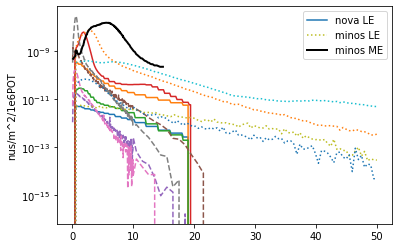

In [40]:
plt.plot(r[0],r[1], ls='-', label='nova LE')
plt.plot(r[0],r[2], ls='-')
plt.plot(r[0],r[4], ls='-')
plt.plot(r[0],r[5], ls='-')
# ## test nd280
plt.plot(nr[0],nr[1],ls='--')
plt.plot(nr[0],nr[2],ls='--')
plt.plot(nr[0],nr[4],ls='--')
plt.plot(nr[0],nr[5],ls='--')
# ## test minos
plt.plot(nur[0],nur[1],ls=':', label='minos LE')
plt.plot(nur[0],nur[2],ls=':')
plt.plot(nur[0],nur[4],ls=':')
plt.plot(nur[0],nur[5],ls=':')

plt.plot(e,numu,lw=2,c='black', label='minos ME')
plt.yscale('log')
plt.legend()
plt.ylabel("nus/m^2/1e6POT")